In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/salary-dataset-simple-linear-regression/Salary_dataset.csv
/kaggle/input/salary-dataset-csv/Salary_dataset.csv


In [2]:
#data visualization
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [3]:
#loading the dataset
df=pd.read_csv("/kaggle/input/salary-dataset-simple-linear-regression/Salary_dataset.csv")

In [4]:
df.head

<bound method NDFrame.head of     Unnamed: 0  YearsExperience    Salary
0            0              1.2   39344.0
1            1              1.4   46206.0
2            2              1.6   37732.0
3            3              2.1   43526.0
4            4              2.3   39892.0
5            5              3.0   56643.0
6            6              3.1   60151.0
7            7              3.3   54446.0
8            8              3.3   64446.0
9            9              3.8   57190.0
10          10              4.0   63219.0
11          11              4.1   55795.0
12          12              4.1   56958.0
13          13              4.2   57082.0
14          14              4.6   61112.0
15          15              5.0   67939.0
16          16              5.2   66030.0
17          17              5.4   83089.0
18          18              6.0   81364.0
19          19              6.1   93941.0
20          20              6.9   91739.0
21          21              7.2   98274.0
22  

In [5]:
#shape of the data
df.shape

(30, 3)

In [6]:
#checking for duplicates
df.duplicated().sum()

0

In [7]:
#checking for missing values
df.isnull().sum()

Unnamed: 0         0
YearsExperience    0
Salary             0
dtype: int64

In [8]:
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


### Bivariete Analysis

<Axes: xlabel='YearsExperience', ylabel='Salary'>

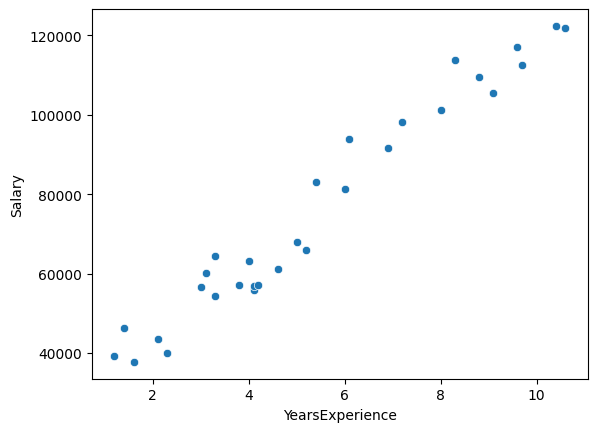

In [9]:
sns.scatterplot(data=df,x='YearsExperience', y='Salary')

In [10]:
#splitting the data
X=df.drop(['Salary'],axis=1)
y=df['Salary']
X.head()

,Unnamed: 0,YearsExperience
0,0,1.2
1,1,1.4
2,2,1.6
3,3,2.1
4,4,2.3


In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15, random_state=1)

### Initialize Linear Regression Model

In [12]:
#Initialize the Model
le=LinearRegression()
le.fit(X_train,y_train)

LinearRegression()

In [13]:
X_test

,Unnamed: 0,YearsExperience
17,17,5.4
21,21,7.2
10,10,4.0
19,19,6.1
14,14,4.6


In [14]:
preds=le.predict(X_test)
print(preds)

[70159.6279292  89616.06739385 61874.68660298 76943.41020588
 63664.50133375]


In [15]:
#evaluate
mse = mean_squared_error(y_test,preds)
mse

107873791.9069992

In [16]:
#importing the mean absolute error
from sklearn.metrics import mean_absolute_error

In [17]:
mae = mean_absolute_error(y_test,preds)
print(mae)

8496.341840365942
